<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br><br>

<h1>Team Assignment</h1><br><br>



<em><strong>A2: Unsupervised Analysis Project </strong></em><br>

Machine Learning - DAT-5303 - BMBAN2<br><br>

<strong>Team 18</strong><br>
Martine Elisabeth Stø Johansen<br>
Juan Pedro Ballester Vives<br>
Ryangkeol Kim<br>
Neha Samson<br>
    
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Executive Summary 

Mobile apps are an integral part of our daily lives, as people on average spend as much as four to five hours daily on their phones (Statistica, 2021). This analysis of app download behavior discovered that data of behaviour psychometrics can find more similarities than demographic filtering, showing the importance of making decisions based behavioural data instead of demographic. We found three main clusters with similar behavior, and we recommend the following approach for each segment, to ensure targeted marketing:<br><br>


<strong>Recommendations</strong>

1. SoMe App Users: Show value and customizability. 
2. Online Streamers: Focus on main social media platforms and improve algorithms.
3. Lifestyle App Users: Market apps that cover a range of functions.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Our Task Head

The problem we are facing is to segment the mobile users into different categories, to find patterns so the marketing team can target specific groups. This is because they can be more susceptible or show a tendency of downloading certain types of apps. Qualitative and quantitative data about users has been analyzed to help understand people’s behavior. Creating clusters patterns can be found to predict consumers behaviors and help to target the desired groups. 
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Market Overview

To improve our analysis and decisions, a good overview of the market is needed.  The mobile app market is growing. By 2023 it is expected to produce over $935 billion in revenue (Cook, D.  2020). Apple App Store offers 1.96 million apps for downloads with a 2.5% growth rate, and Google Play Store offers 2.8 million, growing by 31% in 2020 (Cook, D.  2020).  Growth is expected to increase in the future. 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [1]:
# importing packages 
import numpy             as np                   
import pandas            as pd                   
import matplotlib.pyplot as plt                  
import seaborn           as sns                  
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA      
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans # k-means clustering


# loading data
app_survey = pd.read_excel('./Mobile_App_Survey_Data.xlsx')

#  User-Defined Functions

In [2]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False, axvline = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')

    

    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)
    
    #  add vertical lines to the code
    if axvline != False:
        plt.axvline(x = axvline,
                    color = 'red')
    
    if export == True:
    
        # exporting the plot
        plt.savefig('./__analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

# Analysis

The first section will focus on likert scales data and intervals. Later, categorical data will be included with  all the other categories combined, to create clusters. Then we include demographic data at the end with our final analysis using boxplots. 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# Features

## Remaning

In [3]:
# Setting new names for questions, to make it easier to work with
names = ['id_case','q1_age','q2_iphone','q2_ipod','q2_android','q2_blackberry',
         'q2_nokia','q2_windows','q2_hp','q2_tablet','q2_other','q2_none',
         'q4_music_sound','q4_tv','q4_entertainment','q4_tv_shows','q4_gaming',
         'q4_social','q4_general_news','q4_shopping','q4_specific_news','q4_other',
         'q4_none', 'q11_nr_apps','q12_free_pct','q13_visits_facebook',
         'q13_visits_twitter','q13_visits_myspace','q13_visits_pandora',
         'q13_visits_vevo','q13_visits_youtube','q13_visits_aol',
         'q13_visits_lastfm','q13_visits_yahoo','q13_visits_imdb',
         'q13_visits_linkedin','q13_visits_netflix','q24_tec_dev',
         'q24_tec_advisor','q24_new_gad','q24_much_tec','q24_enjoy_tec',
         'q24_save_time','q24_music','q24_tv_show','q24_much_inf','q24_sns',
         'q24_family','q24_avoid_family','q25_opinion_leader','q25_stand_out',
         'q25_offer_advice','q25_lead_decision','q25_first_new',
         'q25_responsibility','q25_control','q25_risk_taker','q25_creative',
         'q25_optimistic','q25_active','q25_stretched_time','q26_luxury_brand',
         'q26_discount','q26_shopping','q26_package_deal','q26_online_shop',
         'q26_designer_brand','q26_not_enough_app','q26_not_number_app','q26_new_app',
         'q26_child_impact','q26_extra_pay','q26_earning_money','q26_trend',
         'q26_brand_reflect','q26_impulse_purchases','q26_entertainment',
         'q48_education','q49_married','q50_nochild','q50_child<6','q50_child6-12',
         'q50_child13-17','q50_child>18','q54_race','q55_latino','q56_income',
         'q57_gender',]

# Renaming questions
app_survey.columns = names

## Feature engineering 

In [4]:
# Creating a dummy column 
app_survey['Children_status'] = 0

# Using itterrows to replace previous column with new column
for index, col in app_survey.iterrows():
    
    # Conditionals to set the values in the new column
    if app_survey.loc[index, 'q50_nochild'] == 1:
        app_survey.loc[index, 'Children_status'] = 'no_children'
        
    elif app_survey.loc[index, 'q50_child<6'] == 1:
        app_survey.loc[index, 'Children_status'] = 'children_under_6'

    elif app_survey.loc[index, 'q50_child6-12'] == 1:
        app_survey.loc[index, 'Children_status'] = 'children_between_6-12'   
    
    elif app_survey.loc[index, 'q50_child13-17'] == 1:
        app_survey.loc[index, 'Children_status'] = 'children_between_13-17'
        
    elif app_survey.loc[index, 'q50_child>18'] == 1:
        app_survey.loc[index, 'Children_status'] = 'children_over_18'

In [5]:
# Creating a dummy column 
app_survey['Device'] = 0

# Using itterrows to replace previous column with new column
for index, col in app_survey.iterrows():
    
    # Conditionals to set the values in the new column
    if app_survey.loc[index, 'q2_iphone'] == 1:
        app_survey.loc[index, 'Device'] = 'iPhone'
        
    elif app_survey.loc[index, 'q2_ipod'] == 1:
        app_survey.loc[index, 'Device'] = 'iPod'

    elif app_survey.loc[index, 'q2_android'] == 1:
        app_survey.loc[index, 'Device'] = 'Android'   
    
    elif app_survey.loc[index, 'q2_blackberry'] == 1:
        app_survey.loc[index, 'Device'] = 'Blackberry'

    elif app_survey.loc[index, 'q2_nokia'] == 1:
        app_survey.loc[index, 'Device'] = 'Nokia'   
        
    elif app_survey.loc[index, 'q2_windows'] == 1:
        app_survey.loc[index, 'Device'] = 'Windows'

    elif app_survey.loc[index, 'q2_hp'] == 1:
        app_survey.loc[index, 'Device'] = 'HP'   
        
    elif app_survey.loc[index, 'q2_tablet'] == 1:
        app_survey.loc[index, 'Device'] = 'Tablet'   
        
    elif app_survey.loc[index, 'q2_other'] == 1:
        app_survey.loc[index, 'Device'] = 'Other'

    elif app_survey.loc[index, 'q2_none'] == 1:
        app_survey.loc[index, 'Device'] = 'None'  

In [6]:
# Combining similar apps to fewer variations

# Creating a dummy column 
app_survey['q4_TV_entertainment'] = 0

# Using itterrows to replace previous column with new column formated to fit
for index, col in app_survey.iterrows():
    
    # Conditionals to set the values in the new column
    if app_survey.loc[index, 'q4_tv'] == 1:
        app_survey.loc[index, 'q4_TV_entertainment'] = 1
        
    elif app_survey.loc[index, 'q4_entertainment'] == 1:
        app_survey.loc[index, 'q4_TV_entertainment'] = 1

    elif app_survey.loc[index, 'q4_tv_shows'] == 1:
        app_survey.loc[index, 'q4_TV_entertainment'] = 1  
    

    
    
# Creating a dummy column 
app_survey['q4_news'] = 0

# Using itterrows to replace previous column with new column formated to fit
for index, col in app_survey.iterrows():
    
    # Conditionals to set the values in the new column
    if app_survey.loc[index, 'q4_general_news'] == 1:
        app_survey.loc[index, 'q4_news'] = 1
        
    elif app_survey.loc[index, 'q4_specific_news'] == 1:
        app_survey.loc[index, 'q4_news'] = 1


## Categorizing

In [7]:
# Creating a category with demographics 
demographics = ['q1_age', 'q48_education', 'q49_married', 'Children_status', 
                'q54_race', 'q55_latino', 'q56_income', 'q57_gender']

In [8]:
# Creating a category with channels 
channels = app_survey['Device'] 

In [9]:
# creating a category with dummies based on q4
dummies = ['q4_music_sound', 'q4_TV_entertainment' ,'q4_gaming',
            'q4_social','q4_shopping', 'q4_news','q4_other',
            'q4_none']

# Creating a category with app behaviour 
app_behaviour = ['q11_nr_apps','q12_free_pct','q13_visits_facebook',
             'q13_visits_twitter','q13_visits_myspace','q13_visits_pandora',
             'q13_visits_vevo','q13_visits_youtube','q13_visits_aol',
             'q13_visits_lastfm','q13_visits_yahoo','q13_visits_imdb',
             'q13_visits_linkedin','q13_visits_netflix' ]

In [10]:
# Creating a sublist to easily insert and remove from Likert list
q24 = ['q24_tec_dev','q24_tec_advisor','q24_new_gad','q24_much_tec','q24_enjoy_tec',
         'q24_save_time','q24_music','q24_tv_show','q24_much_inf','q24_sns',
         'q24_family','q24_avoid_family']

q25 = ['q25_opinion_leader','q25_stand_out',
         'q25_offer_advice','q25_lead_decision','q25_first_new',
         'q25_responsibility','q25_control','q25_risk_taker','q25_creative',
         'q25_optimistic','q25_active','q25_stretched_time']


q26 = ['q26_luxury_brand',
         'q26_discount','q26_shopping','q26_package_deal','q26_online_shop',
         'q26_designer_brand','q26_not_enough_app','q26_not_number_app','q26_new_app',
         'q26_child_impact','q26_extra_pay','q26_earning_money','q26_trend',
         'q26_brand_reflect','q26_impulse_purchases','q26_entertainment']

# creating list with the subslists
likert = q24 + q25 + q26

## Log tranform

In [11]:
# looping to logarithmically transform features
for col in app_survey:
    if col in likert:
        app_survey[f"log_{col}"] = np.log(app_survey[col])

In [12]:
# looping to logarithmically transform features
for col in app_survey:
    if col in app_behaviour:
        app_survey[f"log_{col}"] = np.log(app_survey[col])

## Scaling

In [13]:
#  creating list of columns to use
keep_lst = []

for value in likert:
    keep_lst.append('log_' + value)

In [14]:
#  creating list of columns to use
keep_lst2 = []

for value in app_behaviour:
    keep_lst2.append('log_' + value)

In [15]:
# transposing datafram to scaling user responses 

# dropping demographic information
likert = app_survey[keep_lst]

likert = likert.transpose()

# applying the unsupervised_scaler function
likert_scaled = unsupervised_scaler(df = likert)

likert_scaled = likert_scaled.transpose()
likert = likert.transpose()

In [16]:
# transposeing dataframe back to original structure

# applying the unsupervised_scaler function
likert_scaled = unsupervised_scaler(df = likert_scaled)


In [17]:
# transposeing dataframe back to original structure

# dropping demographic information
app_behaviour = app_survey[keep_lst2]

# applying the unsupervised_scaler function
app_behaviour_scaled = unsupervised_scaler(df = app_behaviour)


# PCA

## Likert

In [18]:
# instanting a PCA object with no limit to principal components
pca = PCA(n_components = None,
            random_state = 219)


# fitting and transforming the scaled data
app_survey_pca = pca.fit_transform(likert_scaled)


## Behaviour

In [19]:
# instanting a PCA object with no limit to principal components
pca_app_behaviour = PCA(n_components = None,
            random_state = 219)


# fitting and transforming the scaled data
app_behaviour_pca = pca_app_behaviour.fit_transform(app_behaviour)


## PC Determination 

### Likert

In [20]:
# Finding Ratio under each category 


# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(3)}")

PC 1: 0.087
PC 2: 0.066
PC 3: 0.061
PC 4: 0.043
PC 5: 0.036
PC 6: 0.032
PC 7: 0.031
PC 8: 0.031
PC 9: 0.029
PC 10: 0.028
PC 11: 0.026
PC 12: 0.025
PC 13: 0.025
PC 14: 0.024
PC 15: 0.023
PC 16: 0.023
PC 17: 0.022
PC 18: 0.021
PC 19: 0.021
PC 20: 0.021
PC 21: 0.02
PC 22: 0.02
PC 23: 0.019
PC 24: 0.019
PC 25: 0.018
PC 26: 0.018
PC 27: 0.018
PC 28: 0.017
PC 29: 0.017
PC 30: 0.017
PC 31: 0.016
PC 32: 0.016
PC 33: 0.016
PC 34: 0.015
PC 35: 0.015
PC 36: 0.014
PC 37: 0.013
PC 38: 0.013
PC 39: 0.013
PC 40: 0.012


#### Scree Plot

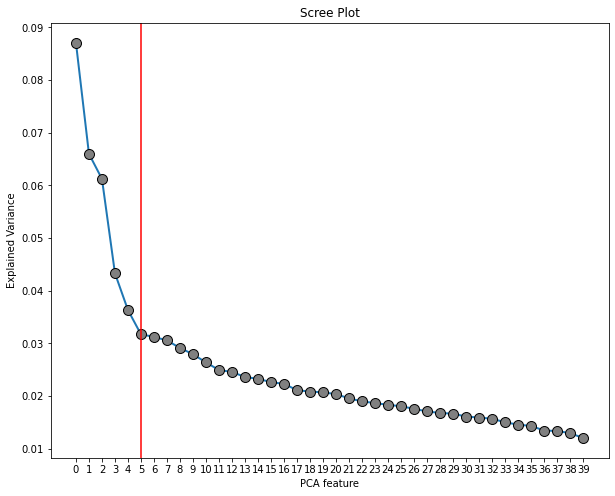

In [21]:
# Checking for elbow and marking with a red line where to cut off
scree_plot(pca_object = pca,
          export = False,
          axvline = 5)

<strong>Scree Plot Break-off Point for Likert </strong>

This PCA scree plots based on likert scales questions does not have a clear elbow, however,  after point five the variance between the plots drastically minimizes. Based on this, a natural cutting-off point is at point five, as marked with the red line.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

### app_behaviour

In [22]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca_app_behaviour.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(3)}")

PC 1: 0.297
PC 2: 0.11
PC 3: 0.081
PC 4: 0.074
PC 5: 0.07
PC 6: 0.063
PC 7: 0.05
PC 8: 0.048
PC 9: 0.046
PC 10: 0.043
PC 11: 0.038
PC 12: 0.032
PC 13: 0.027
PC 14: 0.022


#### Scree Plot

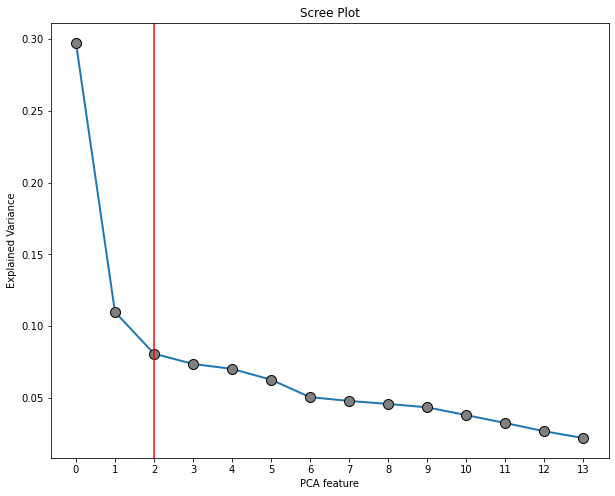

In [23]:
# Checking for elbow and marking with a red line where to cut off
scree_plot(pca_object = pca_app_behaviour,
          export = False,

           axvline = 2)

<strong>Scree Plot Break-off Point for Behaviour </strong>

For the app behaviour screen plots the variance is more even, without a clear point where it starts to minimize. But this scree plot displays a more clear elbow ending with plot three, therefore, we decided to cut here as PC1, PC2 and PC2 captures the most valuable data for the marketing department.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Setting Principal Components Numbers

### Likert

In [24]:
# transposing pca components
factor_loadings_df = pd.DataFrame(np.transpose(pca.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(likert.columns)


Cutting at the elbow, after point 5 as this has a three times as large decrease as the next ones.

In [25]:
# instanting a new model using the first six principal components
pca_5 = PCA(n_components = 6,
            random_state = 219)


# fitting and transforming the purchases_scaled
app_survey_pca_5 = pca_5.fit_transform(likert_scaled)


### Behaviour

In [26]:
# transposing pca components
factor_loadings_df_app_behaviour = pd.DataFrame(np.transpose(pca_app_behaviour.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_df_app_behaviour = factor_loadings_df_app_behaviour.set_index(app_behaviour_scaled.columns)


In [27]:
# instanting a new model using the first three principal components
pca_3 = PCA(n_components = 3,
            random_state = 219)


# fitting and transofrming the purchases_scaled
app_survey_pca_3 = pca_3.fit_transform(app_behaviour_scaled)


## Interpreting Principal Components 

### Likert

<strong> Reasoning behind principal component names </strong>

To be able to easier analyze our clusters we name and give meaning to each principal component based on its factor loading. After analyzing each one, these are what they had in common and the reasoning behind their name.<br><br>

<strong>Social Butterflies:</strong> Strong personalities and leader mentality; they want to stand out, be recognized but also hold people accountable. Don’t like getting told what to do. Not interested in short term goals, they are in long term ones, thus why shopping doesn't feel interesting since it detracts from their goals. Tech and apps improve life.<br><br>

    
<strong>Introverted-tech savvy:</strong> Interested in technology and don’t want to lead or stand out, rather modest and individual people. Not very active and creative people. Immersed and interested in their virtual and technological world.<br><br>

    
<strong>Everyman:</strong> Average working individual, keeps up with tech because he must. They believe there is too much tech and information. Don’t display leadership or distinctive qualities, and are not risk-takers. Aren’t too interested in shopping unless necessary.<br><br>

    
<strong>Frugalish:</strong> Not too interested in technology in general, nevertheless, they do get new gadgets. Interested in shopping, traditional or online, but are really interested in discounts, thus why they like to shop but buying cheap. Alternates between shopping methods using technology and apps for discounts, making the best of every purchase.<br><br>

    
<strong>Old-Fashioned:</strong> Set in their ways,  not keen or interested in technology and apps, in fact, they prefer to do things the way they have been used to. Rely on children to know what to download and use.<br><br>

    
<strong>Guardian Angels:</strong> Try to keep up with technology, but they think that there is too much technology information in apps. No apps for social networks and aren’t the first to try things out or take risks. Active and optimistic and feel like their time is overstretched. Care about the extra pay because they like luxury products. Plan things before purchasing them.



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [28]:
# transposing pca components
factor_loadings_5 = pd.DataFrame(np.transpose(pca_5.components_.round(decimals = 2)))

# naming rows as original features
factor_loadings_5 = factor_loadings_5.set_index(likert.columns)

# naming each principal component
factor_loadings_5.columns = ['Social_Butterflies','Introverted-tech_Savvy', 'EveryMan', 'Frugalish ', 'Old_Fashioned', 'Guardian_Angels']

factor_loadings_5

,Social_Butterflies,Introverted-tech_Savvy,EveryMan,Frugalish,Old_Fashioned,Guardian_Angels
log_q24_tec_dev,-0.07,0.01,0.30,-0.07,-0.13,0.20
log_q24_tec_advisor,0.20,0.21,0.12,0.22,0.08,0.04
log_q24_new_gad,0.07,0.21,0.08,0.19,0.20,0.03
log_q24_much_tec,-0.08,-0.12,0.39,-0.06,-0.15,0.12
log_q24_enjoy_tec,-0.02,0.17,0.10,-0.08,0.04,-0.02
log_q24_save_time,0.17,0.12,0.07,0.21,-0.08,-0.05
log_q24_music,0.19,0.24,0.06,-0.03,-0.04,0.10
log_q24_tv_show,0.22,0.28,0.02,-0.01,-0.09,-0.05
log_q24_much_inf,-0.09,-0.16,0.41,-0.06,-0.11,0.13
log_q24_sns,0.19,0.27,-0.05,-0.11,-0.12,-0.18


In [29]:
# analyzing factor strengths per customer
factor_loadings = pca_5.transform(likert_scaled)

# converting to a DataFrame
factor_loadings_df = pd.DataFrame(factor_loadings)

factor_loadings_df.columns = factor_loadings_5.columns


### Behaviour

<strong> Reasoning behind principal component names </strong>

We continue with behavioural PCs and rename them to be able to more easily analyze our clusters with meaningful names. These are what they had in common and the reasoning behind their name.<br><br>

<strong>Dormant:</strong> Doesn’t seem to use much of any social media or entertainment apps,  don’t seem to be very active in general regarding apps.<br><br>

<strong>Streamers:</strong> Seems to focus the time they spend on apps in streaming platforms, whether it's music streaming or video streaming. They do not seem too keen or interested in news. <br><br>

<strong>Early adapters:</strong>Adapts to new technology platforms and apps and sticks to them, like YouTube, and not too interested in change.



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [30]:
# transposing pca components
factor_loadings_3 = pd.DataFrame(np.transpose(pca_3.components_.round(decimals = 2)))

# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(app_behaviour_scaled.columns)

# naming each principal component
factor_loadings_3.columns = ['Dormant','Streamers', 'Early_Adapters']

factor_loadings_3

,Dormant,Streamers,Early_Adapters
log_q11_nr_apps,0.04,-0.48,0.51
log_q12_free_pct,-0.14,-0.26,-0.04
log_q13_visits_facebook,-0.10,0.38,0.47
log_q13_visits_twitter,-0.30,0.02,-0.03
log_q13_visits_myspace,-0.35,-0.26,0.02
log_q13_visits_pandora,-0.22,0.33,-0.07
log_q13_visits_vevo,-0.33,-0.01,0.00
log_q13_visits_youtube,-0.22,0.24,0.52
log_q13_visits_aol,-0.36,-0.24,-0.05
log_q13_visits_lastfm,-0.36,-0.08,-0.06


In [31]:
# analyzing factor strengths per customer
factor_loadings_behaviour = pca_3.transform(app_behaviour_scaled)

# converting to a DataFrame
factor_loadings_behaviour_df = pd.DataFrame(factor_loadings_behaviour)

factor_loadings_behaviour_df.columns = factor_loadings_3.columns


# Clustering

In [32]:
################################
# createing clustering data set
################################

# adding dummies to the data set
dummies_df = app_survey[dummies]

# setting  data sets to be added 
scaled = [factor_loadings_df, factor_loadings_behaviour_df, dummies_df]

# combining data frames
scaled_df = pd.concat(scaled, axis = 1)


In [33]:
# applying the unsupervised_scaler function
pca_scaled = unsupervised_scaler(df = scaled_df)


## Agglomerative Clustering

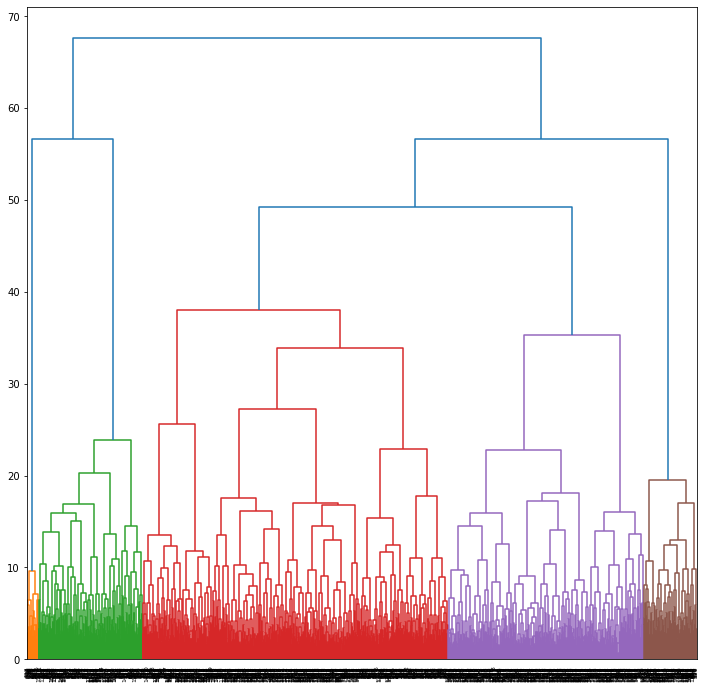

In [34]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# rendering the plot
plt.show()

<strong> Choosing Number of Clusters </strong> 

Using agglomerative clustering to assess the number of clusters. Here we can see that there are three large groupings that we want to move forward with and one smaller outlier group. Therefore, we choose to continue with three clusters as this number showed an even distribution.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [35]:
# instantiating a k-Means object with four clusters
customers_k_pca = KMeans(n_clusters   = 4,
                         random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
app_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(app_kmeans_pca.iloc[: , 0].value_counts())

2    677
0    578
1    270
3     27
Name: Cluster, dtype: int64


## Analysing Clusters to Create Personas

In [36]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = scaled_df.columns


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Social_Butterflies,Introverted-tech_Savvy,EveryMan,Frugalish,Old_Fashioned,Guardian_Angels,Dormant,Streamers,Early_Adapters,q4_music_sound,q4_TV_entertainment,q4_gaming,q4_social,q4_shopping,q4_news,q4_other,q4_none
0,-0.23,0.03,-0.18,-0.45,-0.11,0.02,-0.48,-0.05,-0.31,-0.21,-0.70,-0.18,0.47,-0.45,-0.31,0.13,-0.13
1,0.45,0.43,-0.27,0.38,0.20,0.00,0.10,0.88,0.39,-0.39,-0.18,-0.42,-1.95,-0.26,-0.42,0.05,-0.13
2,0.00,-0.23,0.29,0.24,0.01,-0.03,0.40,-0.36,0.10,0.39,0.71,0.40,0.46,0.52,0.48,-0.12,-0.13
3,0.33,0.75,-0.69,-0.31,0.16,0.33,-0.91,1.30,0.02,-1.51,-1.13,-1.80,-2.09,-0.95,-1.26,-0.29,7.52


# Finalising DataFrame with New Values

To complete the code, we concatenate demographics and the PCA components into one DataFrame. Then we rename variables in demographics to make then easy to interpret and rename our final clusters with meaningful names. Here are our 3 clusters:


<strong> Some app users:</strong>  Rather large range of uses for apps. Use a bit of everything, particularly social media. They don’t tend to use apps for entertainment or shopping.

<strong> Online streamers:</strong>  Early adopters of apps,  using them for watching videos or movies. They alone define the cluster.

<strong> Lifestyle app users:</strong>  Mostly use apps that are related to entertainment such as streaming or music, but also for shopping and news. Average daily user of apps.


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [37]:
new_names = app_survey[demographics].columns.append(app_kmeans_pca.columns).append(scaled_df.columns)

In [38]:
# concatinating cluster behaviour with principal components
clst_pca_df = pd.concat([app_kmeans_pca,
                          scaled_df],
                          axis = 1)


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([app_survey.loc[ : , demographics],
                                  clst_pca_df.round(decimals = 2)],
                                  axis = 1)


# renaming columns
final_pca_clust_df.columns = new_names


In [39]:
# renaming age
age_names = {1 : '> 18',
             2 : '18-24',
             3 : '25-29',
             4 : '30-34',
             5 : '35-39',
             6 : '40-44',
             7 : '45-49',
             8 : '50-54',
             9 : '55-59',
             10 : '60-64',
             11 : '65 <'}


final_pca_clust_df['q1_age'].replace(age_names, inplace = True)


# renaming education
education_names = {1 : 'Some high school',
             2 : 'High school graduate',
             3 : 'Some college',
             4 : 'College graduate',
             5 : 'Some post-graduate studies',
             6 : 'Post graduate degree'}


final_pca_clust_df['q48_education'].replace(education_names, inplace = True)

                   
# renaming married
married_names = {1 : 'Married',
                 2 : 'Single',
                 3 : 'Single with a partner',
                 4 : 'Separated/Widowed/Divorced'}

final_pca_clust_df['q49_married'].replace(married_names, inplace = True)

   
                             
# renaming race
race_names = {1 : 'White or Caucasian',
             2 : 'Black or African American',
             3 : 'Asian',
             4 : 'Native Hawaiian or Other Pacific Islander',
             5 : 'American Indian or Alaska Native',
             6 : 'Other race'}

final_pca_clust_df['q54_race'].replace(race_names, inplace = True)


# renaming latino
latino_names = {1 : 'Hispanic or Latino',
                2 : 'Not Hispanic or Latino'}


final_pca_clust_df['q55_latino'].replace(latino_names, inplace = True)
         
              

# renaming income
income_names = {1 : '<$10,000',
                 2 : '10,000-$14,999',
                 3 : '15,000-$19,999',
                 4 : '20,000-$29,999',
                 5 : '30,000-$39,999',
                 6 : '40,000-$49,999',
                 7 : '50,000-$59,999',
                 8 : '60,000-$69,999',
                 9 : '70,000-$79,999',
                 10 : '80,000-$89,999',
                 11 : '90,000-$99,999',
                 12 : '100,000-$124,999',
                 13 : '125,000-$149,999',
                 14 : '150,000<'}

final_pca_clust_df['q56_income'].replace(income_names, inplace = True)


# renaming gender
gender_names = {1 : 'male',
                2 : 'female'}


final_pca_clust_df['q57_gender'].replace(gender_names, inplace = True)
   
    
    
# renaming clusters
cluster_names = {0 : 'SoMe_App_Users',
                 1 : 'Online_Streamers',
                 2 : 'Lifestyle_App_Users',
                 3 : 'Not_Applicable'}


final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)


  
# adding a productivity step
data_df = final_pca_clust_df



# Boxplot Analysis (Analyze with demographics)

As the boxplot are used to analyze demographic information with the clusters we have created, we can use them to see if there is any difference between the clusters given the different demographic information. Mostly, the boxplots showed consistent behavior over the different demographics, showing that any potential difference in behaviour was captured in the data and in some cases even showed that the different demographics was more highly represented in one cluster, or PC.  
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

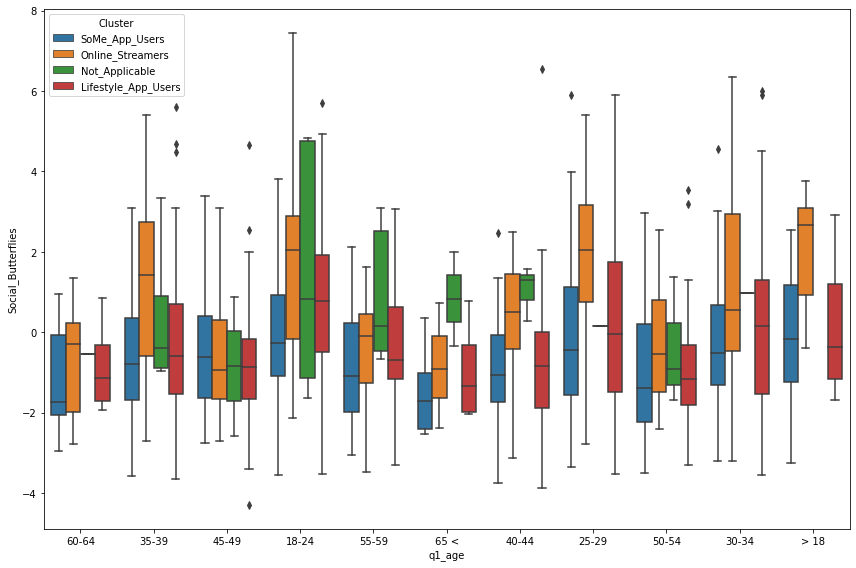

In [40]:
# setting boxplot to analyze with demographics
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'q1_age',
            y = 'Social_Butterflies',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

Our hypotheses and assumptions was that with our clusters, age would not make that much of an variance. However, as this boxplot shows, there is a lot of varaiance between ages. There is a higher possibility of being a Social butterfly for the younger age-groups inside each cluster. 

Online streamers have a special large difference depending on age group. Here we could consider this group further into two groups, as they might should be treated differently, one with younger groups(>18 to 35-39) and one with older groups(40-44 to 65<). 

For the other features in our cluster, demographics did not make any distinguishable difference.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [41]:
data_df.columns

Index(['q1_age', 'q48_education', 'q49_married', 'Children_status', 'q54_race',
       'q55_latino', 'q56_income', 'q57_gender', 'Cluster',
       'Social_Butterflies', 'Introverted-tech_Savvy', 'EveryMan',
       'Frugalish ', 'Old_Fashioned', 'Guardian_Angels', 'Dormant',
       'Streamers', 'Early_Adapters', 'q4_music_sound', 'q4_TV_entertainment',
       'q4_gaming', 'q4_social', 'q4_shopping', 'q4_news', 'q4_other',
       'q4_none'],
      dtype='object')

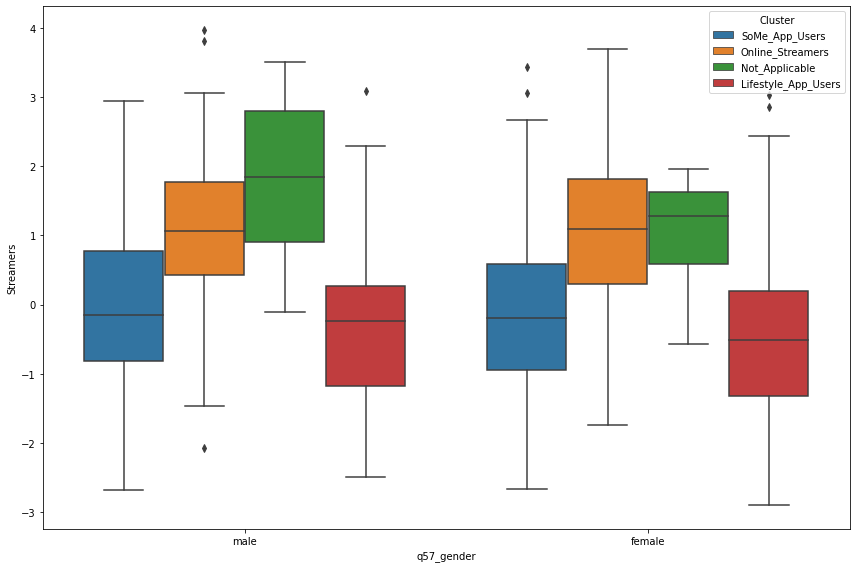

In [42]:
# setting boxplot to analyze with demographics
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'q57_gender',
            y = 'Streamers',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# Persona Exemplified

In [43]:
# Printing to get information about one persona inside cluster "SoMe_App_Users"
data_df.iloc[[7]]

,q1_age,q48_education,q49_married,Children_status,q54_race,q55_latino,q56_income,q57_gender,Cluster,Social_Butterflies,...,Streamers,Early_Adapters,q4_music_sound,q4_TV_entertainment,q4_gaming,q4_social,q4_shopping,q4_news,q4_other,q4_none
7,40-44,College graduate,Married,children_between_13-17,White or Caucasian,Not Hispanic or Latino,"90,000-$99,999",female,SoMe_App_Users,-2.55,...,0.98,0.88,0,0,0,1,0,1,0,0


In [44]:
data_df.to_excel('./Cluster_dfdf.xlsx',
                          index = True)

<strong> Example a SoMe App Users</strong> <br>
A woman in her forties, Alison is balanced in her informed choices and knows what she wants. Though she is tech-savvy, Alison does not have too many apps, as she is quite selective on the apps she chooses to engage with. She enjoys social media as a source of amusement and connection, especially Facebook. Alison likes to observe and remain behind the scenes; however, she checks on her loved ones.
Alison entertains herself with TV shows on Netflix, however, check the reviews on IMDB first. Regarding music, Alison enjoys highly personalized services like Pandora. 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# Key insights

Our analysis shows that data of behaviour psychometrics can find more similarities than demographic filtering, showing the importance of making decisions based behavioural data. We can see that people are similar across demographics, however, there are exceptions. Therefore, we recommend marketing towards our three clusters that behave similarly. The following is our key insights for each cluster:  <br>

<strong> SoMe app users</strong> <br>
For “SoMe users” cluster, a personalized experience is an important factor, else, they tend to lose interest quickly. Since this group wants facts, it is better to target them with shorter advertisements, no more than 8 seconds.  <br><br>
<strong> Online Streamers</strong> <br>
Our analysis shows that 88% of this segment use social media like Facebook, YouTube, Pandora and Netflix to entertain themselves.  <br><br>
<strong> Lifestyle app users</strong> <br>
Users who use lifestyle apps are reasonable and use various apps at the same time without focusing on using only one app. They seem to like a little bit of everything.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


# Recommendation

Based on the insights above, we strongly recommend the marketing development to use this information to treat clusters differently -  marketing the apps that fits their behavior, as this is much more efficient that  marketing to everyone equally. 

<strong>For the marketing department to drive engagement, conversion, and retention, we recommend:</strong> <br>
1. Approach <strong>SoMe app users</strong> with apps that have a clear value, focusing on  personalization by adding features that enhance functionality. As they are short on time, advertisements should not exceed 8 seconds like teasers. Focusing on the design/logo of the app icon could be beneficial as the icon tends to visualize the app.<br><br>

2. To target <strong>Online Streamers</strong>, advertise on the larger social media platforms where they spend most of their time. Focus on improving their algorithms. Implementing and enhancing a search engine optimization would help with the visibility of the business.<br><br>

3. To aim to target the <strong>Lifestyle app users</strong>, due to them using a big range of apps, changing and switching between them, again it will be critical to target them with apps that have clear value and work in more than one particular group, such as QQ.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# Conclusion 

To help the marketing department target, convert and retain customers, the data regarding people and their opinion on apps was analyzed to find patterns. Through our Principal Component Analysis, 9 groups of characteristics were identified which were then further grouped into 3 main clusters; SoMe app users, Online Streamers, Lifestyle app users. Information about these groups helped us develop strategies for the clusters and recommendations such as improving customizability were proposed.

# List of References

Cook, D.(October 2020). Smartphone App Developers. IBISworld. Retrieved from:
https://my-ibisworld-com.hult.idm.oclc.org/us/en/industry-specialized/od5817/about#industry-definition <br><br>
James, T(May 2015). Mobile app marketing insights: How consumers really find and use your apps. Google. Retrieved from:
https://www.thinkwithgoogle.com/marketing-strategies/app-and-mobile/mobile-app-marketing-insights/ <br><br>
Statista. (2021). Topic: Mobile app usage. Retrieved 14 December 2021, from https://www.statista.com/topics/1002/mobile-app-usage/ 